In [1]:
import numpy as np
import pandas_datareader as web
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow import keras 
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Dropout


In [2]:
Sequential = keras.models.Sequential
Dense = keras.layers.Dense
LSTM = keras.layers.LSTM
Dropout = keras.layers.Dropout

In [3]:
df = web.DataReader("BBDC4.SA", data_source="yahoo", start="2015-01-01", end="2019-12-31")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,16.833435,16.188368,16.482443,16.269001,16646325.0,12.181644
2015-01-05,16.491928,15.799429,15.989155,16.292715,16428748.0,12.206099
2015-01-06,16.828691,16.193110,16.321175,16.828691,21831909.0,12.607638
2015-01-07,17.691944,16.895096,17.046877,17.497477,23002650.0,13.108670
2015-01-08,17.744120,17.217630,17.549650,17.587597,12495706.0,13.176188
...,...,...,...,...,...,...
2019-12-20,32.663635,32.236362,32.572727,32.445454,24617120.0,30.705662
2019-12-23,32.654545,32.254543,32.445454,32.645454,11294690.0,30.894934
2019-12-26,33.172726,32.563637,32.663635,33.054546,11498850.0,31.282085


In [4]:
df.shape

(1241, 6)

In [5]:
df_bovespa = web.DataReader("^BVSP", data_source="yahoo", start="2015-01-01", end="2019-12-31")
# df_bovespa.reset_index(inplace=True,drop=False)
df_bovespa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,50005.0,48345.0,50005.0,48512.0,2882100.0,48512.0
2015-01-05,48512.0,47264.0,48512.0,47517.0,3866100.0,47517.0
2015-01-06,48061.0,47338.0,47517.0,48001.0,4559300.0,48001.0
2015-01-07,49882.0,48006.0,48006.0,49463.0,4408800.0,49463.0
2015-01-08,50261.0,49017.0,49463.0,49943.0,3621900.0,49943.0
...,...,...,...,...,...,...
2019-12-20,115171.0,114526.0,115133.0,115121.0,6887400.0,115121.0
2019-12-23,115863.0,114964.0,115119.0,115863.0,3995200.0,115863.0
2019-12-26,117220.0,115673.0,115864.0,117203.0,3788900.0,117203.0


In [6]:
df_bovespa.shape

(1235, 6)

In [7]:
df = df.merge(df_bovespa, left_on='Date', right_on='Date', suffixes=('', '_bovespa'))
df.describe()

,High,Low,Open,Close,Volume,Adj Close,High_bovespa,Low_bovespa,Open_bovespa,Close_bovespa,Volume_bovespa,Adj Close_bovespa
count,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,22.158142,21.585978,21.885802,21.888026,1.827563e+07,18.436567,71258.726316,69996.229960,70605.106883,70656.285020,3.794215e+06,70656.285020
std,6.636685,6.516990,6.588668,6.586653,8.797424e+06,6.482696,19634.810008,19447.130086,19532.433000,19564.626768,1.203582e+06,19564.626768
min,9.858160,9.636181,9.687407,9.681715,0.000000e+00,7.666900,38031.000000,37046.000000,37501.000000,37497.000000,0.000000e+00,37497.000000
25%,17.130830,16.574933,16.846336,16.821578,1.252091e+07,12.956546,53498.500000,52677.000000,53087.500000,53094.500000,3.078600e+06,53094.500000
50%,20.711245,20.247932,20.510895,20.488979,1.676645e+07,17.113239,66758.000000,65842.000000,66195.000000,66235.000000,3.658900e+06,66235.000000
75%,27.056474,26.388085,26.825068,26.773416,2.210809e+07,23.004204,86157.000000,84582.500000,85515.000000,85539.000000,4.389100e+06,85539.000000
max,36.309090,35.472729,36.000000,35.827271,8.762744e+07,31.879570,117803.000000,115995.000000,117205.000000,117203.000000,1.104670e+07,117203.000000


In [8]:
data = df.filter(["Close"])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .7)
training_data_len
dataset.shape

(1235, 1)

In [9]:
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(dataset)

In [10]:
scaled_data

array([[0.25194668],
       [0.25285369],
       [0.2733534 ],
       ...,
       [0.89395046],
       [0.88908257],
       [0.887344  ]])

In [11]:
train_data = scaled_data[0:training_data_len,:]
# print(train_data)
window = 60
X_train = []
y_train = []
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i,:])
    y_train.append(train_data[i, 0:1])
    # if i <= (window + 1):
    #   print(X_train)
    #   print(y_train)
    #   print()
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape

(805, 60, 1)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))

In [14]:
X_train.shape

(805, 60, 1)

In [15]:
# Inicializar a RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 100)           40800     
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 80)            57920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                26200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [16]:
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 64)

Epoch 1/50
13/13 [==============================] - 2s 172ms/step - loss: 0.0380
Epoch 2/50
13/13 [==============================] - 2s 146ms/step - loss: 0.0076
Epoch 3/50
13/13 [==============================] - 2s 148ms/step - loss: 0.0045
Epoch 4/50
13/13 [==============================] - 2s 145ms/step - loss: 0.0033
Epoch 5/50
13/13 [==============================] - 2s 151ms/step - loss: 0.0029
Epoch 6/50
13/13 [==============================] - 2s 149ms/step - loss: 0.0027
Epoch 7/50
13/13 [==============================] - 2s 148ms/step - loss: 0.0024
Epoch 8/50
13/13 [==============================] - 2s 149ms/step - loss: 0.0026
Epoch 9/50
13/13 [==============================] - 2s 148ms/step - loss: 0.0028
Epoch 10/50
13/13 [==============================] - 2s 149ms/step - loss: 0.0025
Epoch 11/50
13/13 [==============================] - 2s 146ms/step - loss: 0.0024
Epoch 12/50
13/13 [==============================] - 2s 151ms/step - loss: 0.0022
Epoch 13/50
13/13 [======

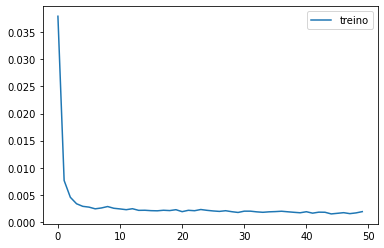

In [17]:
plt.plot(history.history['loss'], label='treino')
plt.legend()

In [18]:
test_data = scaled_data[training_data_len - window:, :]

X_test = []
y_test = dataset[training_data_len:, 0:1]

for i in range(window, len(test_data)): 
    X_test.append(test_data[i-window:i,:])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))
print(X_test.shape, X_train.shape)

(370, 60, 1) (805, 60, 1)


In [19]:
predicted = regressor.predict(X_test)
volume = dataset[training_data_len:, 1:]
predicted = np.column_stack((predicted, volume))
# print(dataset[:,1:])
print(predicted.shape)
predicted = sc.inverse_transform(predicted)
print(predicted)

(370, 1)
[[19.95511387]
 [20.03923378]
 [20.15112587]
 [20.30854418]
 [20.51803086]
 [20.76752781]
 [21.0399854 ]
 [21.30611901]
 [21.54228232]
 [21.75509227]
 [21.95873263]
 [22.1583453 ]
 [22.37232717]
 [22.580984  ]
 [22.77934607]
 [22.98598945]
 [23.19181779]
 [23.3981043 ]
 [23.61249915]
 [23.80912827]
 [23.98181419]
 [24.13090288]
 [24.23948571]
 [24.31331007]
 [24.35692804]
 [24.40610324]
 [24.46785314]
 [24.52945656]
 [24.56375375]
 [24.55322366]
 [24.45778746]
 [24.29070553]
 [24.08581535]
 [23.86132988]
 [23.6362756 ]
 [23.40346986]
 [23.17314353]
 [22.93834303]
 [22.7215989 ]
 [22.5183762 ]
 [22.33783674]
 [22.20524135]
 [22.12447979]
 [22.10148954]
 [22.09940986]
 [22.1084548 ]
 [22.11528213]
 [22.09788731]
 [22.05521607]
 [22.01188953]
 [21.98366697]
 [21.95551376]
 [21.92232225]
 [21.88054242]
 [21.83419025]
 [21.80713103]
 [21.81404642]
 [21.86006665]
 [21.93883658]
 [22.05165124]
 [22.17030132]
 [22.27803483]
 [22.36682136]
 [22.44953637]
 [22.51632068]
 [22.55554396]
 

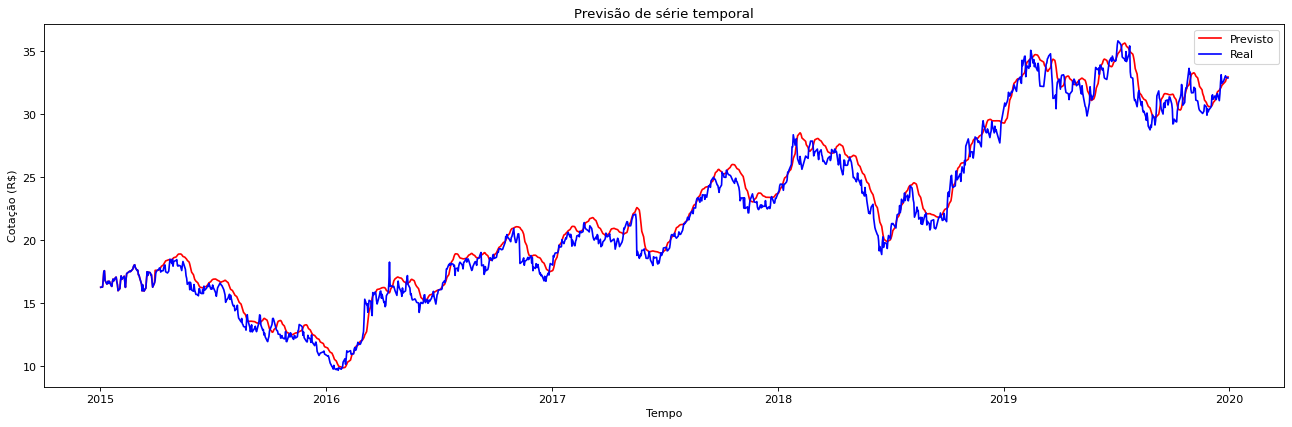

In [20]:
allTargetData = np.vstack((dataset[:training_data_len, 0:1], dataset[training_data_len:, 0:1]))
training_predicted = regressor.predict(X_train)
volume = dataset[:len(X_train), 1:]
training_predicted = np.column_stack((training_predicted, volume))
training_predicted = sc.inverse_transform(training_predicted)
allForecastedData = np.vstack((dataset[0:window, 0:1], training_predicted[:,0:1], predicted[:,0:1]))
# date = df['DATA']
date = df.index

figure(figsize=(20, 6), dpi=80)
plt.plot(date, allForecastedData, color = 'red', label = 'Previsto')
plt.plot(date, allTargetData, color = 'blue', label = 'Real')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

In [21]:
rmse = math.sqrt(mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1]))
print('RMSE: ', rmse)

RMSE:  1.0623393276476312


In [22]:
mse = mean_squared_error(dataset[training_data_len:, 0:1], predicted[:,0:1])
print('MSE: ',mse)

MSE:  1.1285648470668213


In [23]:
mape = np.mean(np.abs((dataset[training_data_len:, 0:1]-predicted[:,0:1]) /dataset[training_data_len:, 0:1])) * 100
print('MAPE: ',mape, '%')

MAPE:  2.905851274384995 %


In [24]:
print('R2: ', r2_score(predicted[:,0:1], dataset[training_data_len:, 0:1]))

R2:  0.9361630332949523


In [26]:
scaled_data = scaled_data
window = 60
X_data = []
y_data = []
for i in range(window, len(scaled_data)):
    X_data.append(scaled_data[i-window:i,:])
    y_data.append(scaled_data[i, 0:1])
X_data, y_data = np.array(X_data), np.array(y_data)
history = regressor.fit(X_data, y_data, epochs = 50, batch_size = 64)

Epoch 1/50
 9/19 [=============>................] - ETA: 1s - loss: 0.0026

KeyboardInterrupt: 

In [ ]:
predicted = regressor.predict(X_data)
print(predicted)
volume = dataset[:len(X_data), 1:]
predicted = np.column_stack((predicted, volume))
predicted = sc.inverse_transform(predicted)
allForecastedData = predicted[:,0:1]
# date = df['DATA']
date = df.index
print(dataset.shape)
print(predicted.shape)
figure(figsize=(20, 6), dpi=80)
plt.plot(dataset[window:, 0:1], color = 'red', label = 'Previsto')
plt.plot(predicted[:,0:1], color = 'blue', label = 'Real')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Cotação (R$)')
plt.legend()
plt.show()

In [ ]:
from datetime import date, datetime, timedelta
today = datetime.today()
today_minus_100 = today - timedelta(days=100)
df_new = web.DataReader("PETR4.SA", data_source="yahoo", start=today_minus_100, end=today)
df_bovespa_new = web.DataReader("^BVSP", data_source="yahoo", start=today_minus_100, end=today)
df_dolar_new = web.DataReader("USDBRL=X", data_source="yahoo", start=today_minus_100, end=today)
df_new = df_new.merge(df_bovespa_new, left_on='Date', right_on='Date', suffixes=('', '_bovespa'))
df_new = df_new.merge(df_dolar_new, left_on='Date', right_on='Date', suffixes=('', '_dolar'))
df_new = df_new.filter(["Close", "Volume", "Close_bovespa", "Volume_bovespa"])

print(df_new.tail())
last_days = df_new.values
scaled = sc.transform(last_days)
x = []
x.append(scaled)
x = np.array(x)
x = np.reshape(x, (x.shape[0], x.shape[1], -1))
pred_price = regressor.predict(x)
volume_new = last_days[0:1, 1:]
pred_price = np.column_stack((pred_price, volume_new))
pred_price = sc.inverse_transform(pred_price)
print(pred_price[0][0])